In [1]:
import pandas as pd

data = pd.read_csv("Tweets.csv", header=0)
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [3]:
data.drop(columns=['textID', 'selected_text'])
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [5]:
data.shape

(27481, 4)

In [6]:
data.dropna()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [7]:
data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [8]:
data=data.dropna()
print(data.duplicated().sum())
print(data.isnull().sum())

0
textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


In [9]:
data=data.reset_index(drop=True)
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


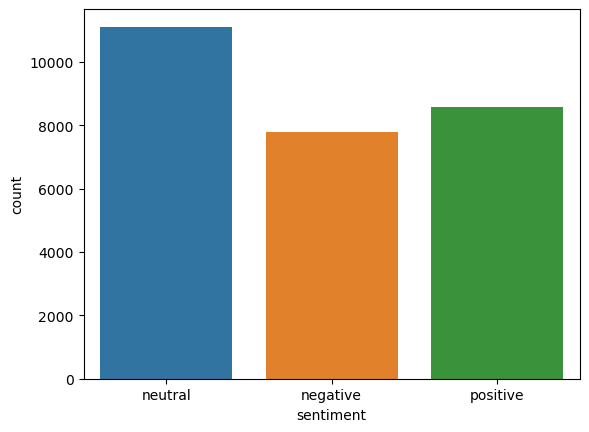

In [10]:
import seaborn as sns
sns.countplot(x='sentiment', data=data)
#sentiment_mapping = {"neutral": 0, "positive": 1, "negative": 2}
#data["sentiment"] = data["sentiment"].map(sentiment_mapping)

data.head()

In [11]:
X=data['selected_text']
y=data['sentiment']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [12]:
train_sentences,test_sentences,train_labels,test_labels=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
print(f'Total training samples :{train_sentences.shape}')
print(f'Total training labels {train_labels.shape}')
print(f'Total test samples:{test_sentences.shape}')
print(f'Total test labels {test_labels.shape}')

Total training samples :(19236,)
Total training labels (19236,)
Total test samples:(8244,)
Total test labels (8244,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Handling missing values by replacing with an empty string
#data["selected_text"] = data["selected_text"].fillna("")

# Preprocessing texts
def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'[^\w\s]', '', processed_text)
    return processed_text

# Separating texts and sentiments
X = data["selected_text"].apply(preprocess_text)
y = data["sentiment"]

# Tokenizing and padding the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoukleyris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-05-21 22:01:01.414203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Creating the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-05-21 22:01:56.835848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-21 22:01:56.837923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-21 22:01:56.839569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir les valeurs de la variable cible en valeurs numériques
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [17]:
from sklearn.preprocessing import LabelEncoder

# Convertir les valeurs de la variable cible en valeurs numériques
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
# Training the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
301/301 [==============================] - 34s 113ms/step - loss: 0.0302 - accuracy: 0.9912 - val_loss: 1.0583 - val_accuracy: 0.8060
Epoch 2/30
301/301 [==============================] - 44s 146ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 1.1558 - val_accuracy: 0.8041
Epoch 3/30
301/301 [==============================] - 34s 112ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 1.1821 - val_accuracy: 0.8091
Epoch 4/30
301/301 [==============================] - 34s 114ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 1.2565 - val_accuracy: 0.8039
Epoch 5/30
301/301 [==============================] - 33s 109ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 1.2165 - val_accuracy: 0.8000
Epoch 6/30
301/301 [==============================] - 33s 111ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 1.2124 - val_accuracy: 0.8000
Epoch 7/30
301/301 [==============================] - 34s 114ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 1.2728 - val_ac

In [18]:
# Predicting on the test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

  8/258 [..............................] - ETA: 1s  

2023-05-21 22:29:55.535853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-21 22:29:55.536867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-21 22:29:55.538293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

258/258 [==============================] - 2s 8ms/step


In [23]:
# Calculating accuracy and loss
accuracy = accuracy_score(y_test, y_pred)
loss = model.evaluate(X_test, y_test)[0]
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

258/258 [==============================] - 2s 8ms/step - loss: 1.3438 - accuracy: 0.8070
Test Accuracy: 0.7943
Test Loss: 1.3438


In [24]:
# Prédiction sur les données d'entraînement
y_train_pred_probs = model.predict(X_train)
y_train_pred = y_train_pred_probs.argmax(axis=1)

# Calcul de l'exactitude sur les données d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = model.evaluate(X_train, y_train)[0]
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")

602/602 [==============================] - 6s 9ms/step - loss: 0.0122 - accuracy: 0.9960
Train Accuracy: 0.9960
Train Loss: 0.0122


In [20]:
nombre_classes = len(data['sentiment'].unique())
nombre_instances = len(data)
print(f"Nombre de classes : {nombre_classes}")
print(f"Nombre d'instances : {nombre_instances}")


hidden_layers = sum([1 for layer in model.layers if isinstance(layer, LSTM)])
print("Nombre de couches cachées : ", hidden_layers)
num_layers = len(model.layers)
print("Nombre de couches dans le modèle : ", num_layers)

Nombre de classes : 3
Nombre d'instances : 27480
Nombre de couches cachées :  1
Nombre de couches dans le modèle :  3
